In [5]:
import pickle
from matplotlib import pyplot as plt
import os
import numpy as np
from PIL import Image
import random
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

epochs = 10

# load the history file using pickle
with open(f'history_{epochs}_epochs.pkl', 'rb') as f:
    history = pickle.load(f)

In [6]:

# define function to preprocess image
DATA_PATH = './data/val_images/'

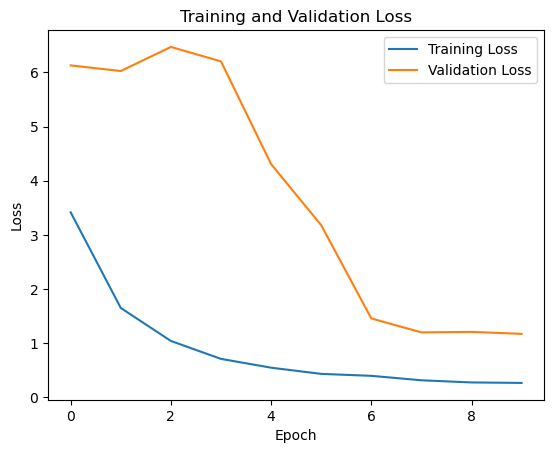

In [7]:
# plot training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

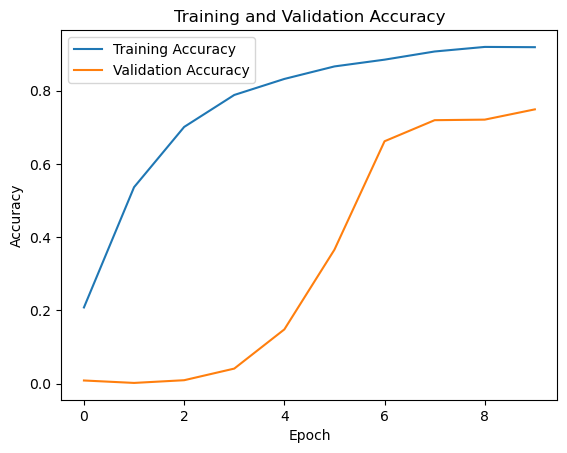

In [8]:
# plot training and validation loss
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [4]:
model = tf.keras.models.load_model(f'resnet50_model_{epochs}_epochs.h5')
#model.summary()

['Poliwhirl', 'Charmeleon', 'Rhyhorn', 'Magnemite', 'Gastly', 'Paras', 'Beedrill', 'Cloyster', 'Kingler']
1/1 [==============================] - 0s 290ms/step
['Poliwhirl', 'Charmeleon', 'Rhyhorn', 'Magnemite', 'Haunter', 'Paras', 'Beedrill', 'Cloyster', 'Kingler']


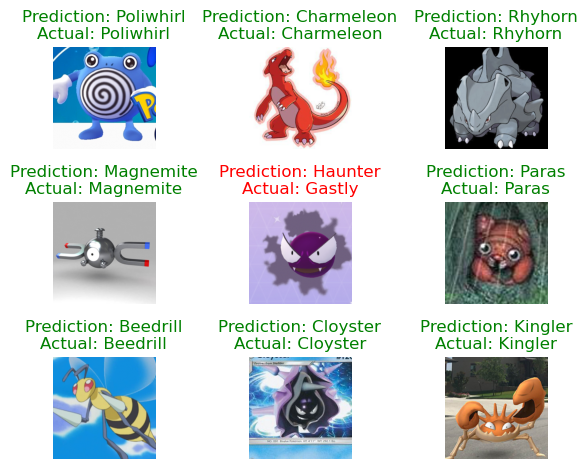

In [10]:
TEST_IMGS = './res/X_test_img/'
all_pokemon = os.listdir(TEST_IMGS)
random_pokemon = random.sample(all_pokemon, 9)
print(random_pokemon)
images = np.empty((9,256,256,3), dtype='uint8')
for i, pokemon in enumerate(random_pokemon):
    pokemon_imgs = os.listdir(TEST_IMGS + pokemon)
    random_img = random.sample(pokemon_imgs, 1)
    random_img = Image.open(TEST_IMGS + pokemon + '/' + random_img[0])
    random_img = random_img.convert('RGB')
    random_img = random_img.resize((256,256))
    random_img = np.array(random_img, dtype='uint8')
    images[i] = random_img

images = images / 255.0

predicted_idx = [np.argmax(p) for p in model.predict(images)]
predicted_labels = [all_pokemon[idx] for idx in predicted_idx]
actual_labels = random_pokemon
print(predicted_labels)
fig, ax = plt.subplots(3, 3)
ax = ax.flatten()
for i, image in enumerate(images):
    ax[i].imshow(images[i])
    color = 'black'
    if predicted_labels[i] == actual_labels[i]:
        color = 'green'
    else:
        color = 'red'
    ax[i].set_title(f'Prediction: {predicted_labels[i]}\nActual: {actual_labels[i]}', color=color)
    ax[i].axis('off')
plt.tight_layout()
plt.show()


In [41]:
"""TODO: ADD EVALUATION"""

Found 1808 files belonging to 149 classes.


ValueError: in user code:

    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/s249404/miniconda3/envs/tf/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 149) are incompatible
